# DETECCIÓN Y TRATAMIENTO DE VALORES ATÍPICOS

## Por: Keveen Rodríguez 
GRUNECO - 2019-1
![gruneco](gruneco.png)

En la fase del pre-procesamiento de los datos una de las características (pasos) más importantes es la detección y el tratamiento de los datos atípicos. 
Los valores atípicos se definen como muestras que son significativamente diferentes de los datos restantes. Esos son puntos que están por fuera del patrón general de la distribución de los datos. Las medidas estadísticas, como la media, la varianza y la correlación, son muy susceptibles a los valores atípicos, generando incclusive sesgo estadístico (bias).
Los algoritmos de aprendizaje automático (del inglés 'Machine learning') son muy sensibles al rango y la distribución de los puntos de datos. Los datos atípicos pueden engañar el proceso de capacitación, lo que resulta en tiempos de capacitación más largos y modelos menos precisos.

Un punto que se desvía del patrón general es un ejemplo simple de un valor atípico.
![oulier](outliers.png)
![outlier_2](outlier_2.jpeg)

En la fase de la exploración de datos consta de muchas cosas, como la identificación de variables, el tratamiento de valores perdidos, la ingeniería de características, etc. La detección y el tratamiento de valores atípicos también es una pieza fundamental en la etapa de exploración de datos. ¡La calidad de sus entradas decide la calidad de su salida!

## Valores atípicos

Un valor atípico es cualquier punto de datos que difiera mucho del resto de las observaciones en un conjunto de datos.
Los valores atípicos pueden ocurrir en el conjunto de datos debido a una de las siguientes razones:
1. Valores extremos altos y bajos en el conjunto de datos
2. Introducido por error humano o mecánico.
3. Introducido por la sustitución de valores perdidos

En algunos casos, la presencia de valores atípicos es informativa y requerirá un estudio adicional. Por ejemplo, los valores atípicos son importantes en los casos de uso relacionados con la administración de transacciones, donde se puede usar un valor atípico para identificar transacciones potencialmente fraudulentas.

## ¿Qué causa los valores atípicos?

Los valores extremos pueden surgir de varios mecanismos o causas diferentes. Anscombe (1960) clasifica los valores atípicos en dos categorías principales: 
1. Los que surgen de los errores en los datos
2. Los que surgen de la variabilidad inherente de los datos. 

No todos los valores atípicos son contaminantes ilegítimos, y no todas las anotaciones ilegítimas se consideran valores atípicos (Barnett y Lewis, 1994).

### Causas

Hay una cantidad de razones por las cuales existen valores atípicos, por lo general se han agrupado en diferentes clases, las cuales se tienen:
- Valores atípicos por errores de datos
- Valores atípicos de información errónea intencional o motivada.
- Valores atípicos por errores de muestreo
- Valores atípicos fallo de estandarización
- Valores atípicos supuestos distributivos defectuosos
- Valores atípicos como casos legítimos muestreados de la población correcta.
- Valores atípicos como posible foco de investigación

Para una mayor profundidad en las causas visitar [Practical assesment, research and evaluation](https://pareonline.net/getvn.asp?v=9&n=6)

### Tipos de valores atípicos

Hay dos tipos, univariado y multivariado.

__Un valor atípico univariado__ es un punto de datos que consta de valores extremos en una sola variable.


__Un valor atípico multivariado__ es una puntuación inusual combinada en al menos dos variables. Supongamos que tiene tres variables diferentes: X, Y, Z. Si traza una gráfica de estas en un espacio 3D, deberían formar una especie de nube. Todos los puntos de datos que se encuentran fuera de esta nube serán los valores atípicos multivariados.


## ¿Cúal es el impacto que tienen sobre el conjuto de datos?

Los valores atípicos pueden cambiar drásticamente los resultados del análisis de datos y el modelado estadístico. 
Vea la imagen de abajo para visualizar lo que le sucede a un modelo cuando hay valores atípicos presentes y cuando se los ha tratado:
![treatment_model](impact-of-outliers.png)
Pero aquí está la advertencia: los valores atípicos no siempre son algo malo, estos son solo observaciones que no siguen el mismo patrón que las otras, pero puede darse el caso de que un valor atípico sea muy interesante. Por ejemplo, si en un experimento biológico, una rata no está muerta mientras que todas las demás lo están, entonces sería muy interesante entender el por qué. Otro ejemplo sería en la compra recurrente de productos por una persona, y en cierto momento adquiere un producto de alto valor, éste podría ser un punto para detectar fraude bancario. Por lo tanto, es importante detectar los valores atípicos.

Es muy importante entender esto. Simplemente eliminar los valores atípicos de sus datos sin tener en cuenta cómo afectarán los resultados es una receta para el desastre.

Existen numerosos impactos desfavorables de valores atípicos en el conjunto de datos:

+ Aumenta la varianza del error y reduce el poder de las pruebas estadísticas.
+ Si los valores atípicos se distribuyen de forma no aleatoria, pueden disminuir la normalidad.
+ Pueden sesgar o influir en estimaciones que pueden ser de interés sustantivo.
+ También pueden afectar el supuesto básico de Regresión, ANOVA y otros supuestos del modelo estadístico.

Para comprender el impacto en profundidad, tomemos un ejemplo para comprobar qué sucede con un conjunto de datos con y sin valores atípicos en el conjunto de datos.


In [1]:
# Pandas Dataframe from Dicts of series. 
  
import pandas as pd 
  
# Intialise data to Dicts of series. 
data = {'Without_outlier' : pd.Series([4, 4, 5, 5, 5, 5, 6, 6, 6, 7, 7], index =['a', 'b', 'c', 'd', 'e', 'f',
                                                                              'g', 'h', 'i', 'j', 'k']), 
      'With_outlier' : pd.Series([4, 4, 5, 5, 5, 5, 6, 6, 6, 7, 7, 300], index =['a', 'b', 'c', 'd', 'e', 'f',
                                                                              'g', 'h', 'i', 'j', 'k', 'l'])}  

# creates Dataframe. 
df = pd.DataFrame(data) 

# print the data. 
df # print(df)

,Without_outlier,With_outlier
a,4.0,4
b,4.0,4
c,5.0,5
d,5.0,5
e,5.0,5
f,5.0,5
g,6.0,6
h,6.0,6
i,6.0,6
j,7.0,7


In [2]:
#Summary statistics
print(df.describe())

#Median and mode
print(f'Mode: {df.mode()}')

       Without_outlier  With_outlier
count        11.000000     12.000000
mean          5.454545     30.000000
std           1.035725     85.033683
min           4.000000      4.000000
25%           5.000000      5.000000
50%           5.000000      5.500000
75%           6.000000      6.250000
max           7.000000    300.000000
Mode:    Without_outlier  With_outlier
0              5.0             5


Como se puede ver, el conjunto de datos con valores atípicos tiene una media y una desviación estándar significativamente diferentes. En el primer escenario, diremos que el promedio es de 5,45. Pero con el valor atípico, el promedio se eleva a 30. Esto cambiaría la estimación por completo.

***
En este documento se mostraré las siguientes formas de identificar y tratar los valores atípicos en su conjunto de datos.

## Detección de valores atípicos
- Análisis de valor extremo (Extreme Value Analysis)
- Método de Z-score (Z-score method)
- Enfoque basado en agrupamiento K-Means (K Means clustering-based approach)
- Visualizando los datos (Visualizing the data)

## Tratamiento de datos atípicos
- Imputación de medida media/mediana o aleatoria (Mean/Median or random Imputation)
- Guarnición (Trimming)
- Codificación superior, inferior y cero (Top, Bottom and Zero Coding)
- Discretización (Discretization)

Sin embargo, __ninguno de estos métodos nos indicará la verdad objetiva acerca de cuáles de las observaciones son valores atípicos__. No existe una definición matemática rígida de lo que constituye un valor atípico; determinar si una observación es un valor atípico o no es un ejercicio subjetivo que depende en gran medida del marco del problema. Por lo tanto, los métodos analizados en este artículo pueden ser un punto de partida para identificar puntos en sus datos que deben tratarse como valores atípicos.

## Detección

Existen múltiples métodos para identificar valores atípicos en el conjunto de datos. Voy a discutir los siguientes tipos:
1. Extreme Value Analysis
2. Z-score method
3. K Means clustering-based approach
4. Visualizing the data

Es importante reiterar que estos métodos no deben usarse mecánicamente. Deben ser utilizados para explorar los datos. Te permiten saber qué puntos podrían merecer una mirada más cercana.

Usaré el conjunto de datos de préstamos de Lending Club de Kaggle para mostrar ejemplos.

In [26]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import dataset
use_cols = ['annual_inc'] # Just upload one column
data = pd.read_csv('loan.csv', usecols=use_cols, nrows = 30000)
data.head()

,annual_inc
0,55000.0
1,90000.0
2,59280.0
3,92000.0
4,57250.0


## Extreme Value Analysis

La forma más básica de detección de valores atípicos es el análisis del Valor Extremo. La clave de este método es determinar las colas estadísticas de la distribución subyacente de la variable y encontrar los valores en el extremo extremo de las colas.

En el caso de una distribución gaussiana, los valores atípicos quedarán fuera de la media más o menos 3 veces la desviación estándar de la variable.

![gaussian curve](gaussian.png)

Si la variable no posee una distribución normal (no es una distribución gaussiana), un enfoque general es calcular los cuartiles y luego el rango intercuartil.

![quartile](quartile.jpg)


> IQR (Inter quantiles range)= 75th quantile — 25th quantile

Un valor atípico estará en los siguientes límites superiores e inferiores:

> Upper Boundary = 75th quantile +(IQR * 1.5)

> Lower Boundary = 25th quantile — (IQR * 1.5)

O para casos extremos:

> Upper Boundary = 75th quantile +(IQR * 3)

> Lower Boundary = 25th quantile — (IQR * 3)

Si el punto de datos está por encima del límite superior o por debajo del límite inferior, puede considerarse como un valor atípico.

In [4]:
# Rango intercuartil para nuestro conjunto de datos
IQR = data.annual_inc.quantile(0.75) - data.annual_inc.quantile(0.25)

# Usando el IQR, calculamos el límite superior usando las fórmulas mencionadas anteriormente
upper_limit = data.annual_inc.quantile(0.75) + (IQR * 1.5)
upper_limit_extreme = data.annual_inc.quantile(0.75) + (IQR * 3)

print(f'Upper limit: {upper_limit}, upper limit extreme: {upper_limit_extreme}')

Upper limit: 178000.0, upper limit extreme: 256000.0


Ahora, veamos la proporción de puntos de datos sobre el límite superior y el límite superior extremo. Es decir, los valores atípicos.

In [5]:
total = np.float(data.shape[0])
print(f'Total data: {total}')
print('Total borrowers: {}'.format(data.annual_inc.shape[0]/total)) # Prestatarios totales
print('Borrowers that earn > 178k: {}'.format(data[data.annual_inc > upper_limit].shape[0] / total))
print('Borrowers that earn > 256k: {}'.format(data[data.annual_inc > upper_limit_extreme].shape[0] / total))

Total data: 30000.0
Total borrowers: 1.0
Borrowers that earn > 178k: 0.05433333333333333
Borrowers that earn > 256k: 0.0162


Podemos ver que aproximadamente el 5% de los datos está por encima del límite superior y el 1% de los datos por encima del límite superior extremo.

## Standard Score (Z-Score)

Z-Score representa la cantidad de desviaciones estándar que una medida dada desvía de la media. En otras palabras, simplemente vuelve a escalar o estandariza sus datos. Un puntaje Z sirve para especificar la ubicación precisa de cada observación dentro de una distribución. El signo del puntaje Z (+ o -) indica si el puntaje está por encima (+) o por debajo (-) de la media.

El objetivo de tomar los Z-Score's es eliminar los efectos de la ubicación y la escala de los datos, lo que permite comparar diferentes conjuntos de datos directamente. La intuición detrás del método de puntaje Z de detección de valores atípicos es que, una vez que hayamos centrado y reescalado los datos, cualquier cosa que esté muy lejos de cero (el umbral suele ser una puntuación Z de 3 o -3) debe considerarse una parte aislada.

La fórmula para calcular la puntuación Z es:

![z-score](z-score.png)


In [9]:
from scipy import stats

# Calculing z-score
z = stats.zscore(data)
print(z)

# Threshold > 3
threshold = 3
print(np.where(z > 3))

[[-0.3040589 ]
 [ 0.06618657]
 [-0.25878317]
 ...
 [ 0.12965722]
 [ 1.22981519]
 [-0.19827448]]
(array([   55,   127,   215,   453,   503,   512,   644,   680,  1059,
        1631,  1803,  2078,  2341,  2508,  2582,  2688,  2689,  2739,
        2967,  3069,  3122,  3272,  3523,  3558,  3565,  3784,  4711,
        4731,  4849,  4931,  5128,  5211,  5534,  5746,  5889,  5957,
        6044,  6214,  6685,  6745,  6834,  6948,  6984,  6992,  7144,
        7551,  7678,  8063,  8091,  8347,  8355,  8709,  8766,  8883,
        9030,  9267,  9370,  9522,  9699, 10135, 10639, 10665, 10787,
       10994, 11053, 11181, 11381, 11467, 11784, 11786, 11881, 12297,
       12336, 12430, 12909, 12978, 13118, 13231, 13483, 13554, 13677,
       13974, 14119, 14309, 14742, 14894, 15073, 15228, 15383, 15460,
       15991, 16045, 16218, 16291, 16780, 16888, 17290, 17335, 17582,
       17862, 17917, 17998, 18050, 18188, 18436, 18634, 18805, 18907,
       18927, 19040, 19159, 19167, 19547, 19703, 19940, 19962, 

En la salida anterior del umbral > 3, la primera matriz contiene la lista de números de fila (posiciones donde es Z>3) y la segunda matriz de la columna respectiva (en este caso sólo hay una columna).

## Clustering Method

La agrupación en clúster es una técnica popular que se utiliza para agrupar puntos de datos u objetos similares en grupos o agrupaciones. También se puede utilizar como una herramienta importante para el análisis de valores atípicos. En este enfoque, comenzamos agrupando el tipo de objetos similares.

Vamos a utilizar la agrupación K-Means, que nos ayudará a agrupar los puntos de datos (valores de ingresos anuales en nuestro caso). La implementación que vamos a utilizar para KMeans utiliza la distancia euclidiana para agrupar objetos similares.

Los centroides son el centro de los grupos generados por kmeans() y avg_distance es la distancia euclidiana promediada entre los puntos de datos y los centroides generados por kmeans(). El siguiente paso es llamar al método vq(). éste devuelve los grupos (clústeres) de los puntos de datos y las distancias entre los puntos de datos y sus grupos más cercanos.

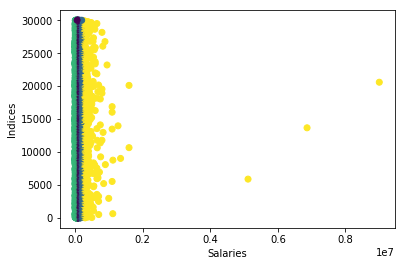

In [10]:
from scipy.cluster.vq import kmeans
from scipy.cluster.vq import vq

# 
data_raw = data['annual_inc'].values # convertimos los datos en una matriz numpy
centroids, avg_distance = kmeans(data_raw, 4) # Tenemos que dar dos entradas: datos y el número de agrupaciones que se formarán
groups, cdist = vq(data_raw, centroids)

y = np.arange(0, total)
plt.scatter(data_raw,  y , c=groups)
plt.xlabel('Salaries')
plt.ylabel('Indices')
plt.show()

Aquí se observa claramete cuales son los datos atípicos

## Graphical Approach

Para la visualización, o inspección visual, se puede hacer uso de las 3 principales formas de visualización, caja de bigotes, histograma y scatter.

### Box plot

El diagrama de diagrama de caja de bigotes es un método gráfico representado típicamente por cuartiles e intercuartiles que ayuda a definir el límite superior y el límite inferior más allá del cual cualquier dato que se encuentre se considerará como valores atípicos.

En resumen, los cuartiles son puntos en una distribución que se relaciona con el orden de clasificación de los valores en esa distribución. Para una muestra dada, se puede encontrar cualquier cuartil ordenando la muestra. El valor medio de la muestra clasificada es el cuartil medio o el percentil 50 (también conocido como la mediana de la muestra).

![quartile](quartile.png)

El propósito mismo de los diagramas de bigotes es identificar valores atípicos en la serie de datos antes de realizar un análisis adicional, de modo que la conclusión del estudio proporcione resultados más precisos que no están influenciados por ningún extremo o valor anormal.

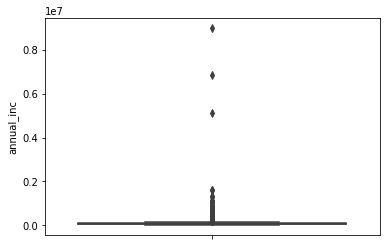

In [11]:
import seaborn as sns


sns.boxplot(y='annual_inc', data = data)

Aquí, los valores atípicos son observaciones que están numéricamente distantes del resto de los datos. Al revisar un diagrama de bigotes, un valor atípico es un punto de datos que se encuentra fuera de las vallas ("bigotes") del diagrama de caja.

### Histograms

Los histogramas son uno de los gráficos más comunes que se utilizan para mostrar datos numéricos y encontrar la distribución del conjunto de datos. Un valor atípico es una observación que se encuentra fuera del patrón general de distribución.

(0, 500000)

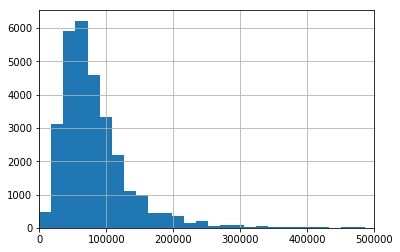

In [12]:
fig = data.annual_inc.hist(bins=500)
fig.set_xlim(0,500000)

Aquí, los puntos de datos en el extremo derecho del eje x pueden considerarse de los valores atípicos.

### Scatter Plot

Los diagramas de dispersión se utilizan para encontrar la asociación entre dos variables y esa asociación a menudo tiene un patrón. Llamamos a un punto de datos como un valor atípico si no se ajusta al patrón.

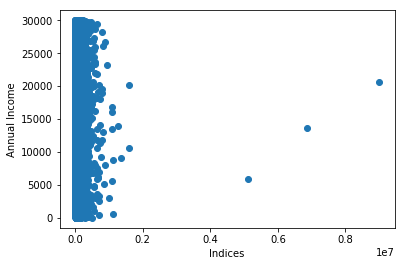

In [14]:
data_raw = data['annual_inc'].values
y = np.arange(0,30000)
plt.scatter(data_raw,  y)
plt.ylabel('Annual Income')
plt.xlabel('Indices')
plt.show()

## Tratamiento

Se tienen las siguientes técnicas:
1. Mean/Median or random Imputation
2. Trimming
3. Top, Bottom and Zero Coding
4. Discretization

### Mean / Median / Random Sampling

Si tenemos razones para creer que los valores atípicos se deben a errores mecánicos o problemas durante la medición. Eso significa que los valores atípicos son en naturaleza similares a los datos faltantes, entonces cualquier método utilizado para imputación de datos faltantes puede ser usado para reemplazar valores atípicos. Los números que aparecen en valores atípicos son pequeños (de lo contrario, no se llamarán valores atípicos) y es razonable utilizar la imputación media / mediana / aleatoria para reemplazarlos.

Esta no es la mejor manera para el tratamiento de los datos, por ende no se va a aplicar.

### Trimming

Bajo este enfoque, se analiza un conjunto de datos que excluye valores atípicos. Los estimadores recortados, como la media / mediana, disminuyen la varianza en los datos y causan un sesgo basado en una subestimación o sobreestimación. Dado que los valores atípicos también son valores observados, excluirlos del análisis hace que este enfoque sea inadecuado para el tratamiento de los valores atípicos.

En este método, descartamos los valores atípicos por completo. Es decir, eliminar los puntos de datos que se consideran valores atípicos. En situaciones en las que no eliminará una gran cantidad de valores del conjunto de datos, el recorte es un enfoque bueno y rápido.

In [24]:
index = data[(data['annual_inc'] >= upper_limit_extreme)].index  # FInd the value index (position)
data.drop(index, inplace=True)  # delete that value by index

Aquí usamos el método de eliminación de la librería pandas para eliminar todos los registros que son más que el valor límite superior que encontramos utilizando el __análisis de valor extremo__.

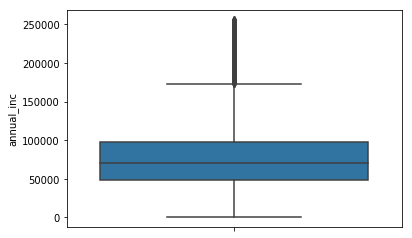

In [23]:
# Show the changes
sns.boxplot(y='annual_inc', data = data)

### Top / bottom / zero Coding

__Top coding__, significa limitar el máximo de la distribución a un valor establecido arbitrario. Una variable en la parte superior es aquella para la cual se censuran los puntos de datos sobre un límite superior. Al implementar la codificación superior, el valor atípico se limita a un cierto valor máximo y se parece a muchas otras observaciones.

__Bottom coding__, es análoga pero en el lado izquierdo de la distribución. Es decir, todos los valores por debajo de un cierto umbral están limitados a ese umbral. Si el umbral es cero, entonces se conoce como __zero coding__. Por ejemplo, para variables como "edad" o "ganancias", no es posible tener valores negativos. Por lo tanto, es razonable limitar el valor más bajo a cero.

In [33]:
print('Annual Income > 256000: {}'.format(data[data.annual_inc > upper_limit_extreme].shape[0])) # value of Upper_limit_extreme
print('Percentage of outliers: {}'.format(data[data.annual_inc > upper_limit_extreme].shape[0]/np.float(data.shape[0]))) # The percentage of this value respect all data

# In this step, we are capping the data points with values greater than 256000 to 256000.
data.loc[data.annual_inc > upper_limit_extreme,'annual_inc'] = upper_limit_extreme # access to higher values with respect to the threshold and replace it
print('Max value in the dataset: {}'.format(data.annual_inc.max()))

Annual Income > 256000: 0
Percentage of outliers: 0.0
Max value in the dataset: 256000.0


### Discretization

La discretización es el proceso de transformación de variables continuas en variables discretas mediante la creación de un conjunto de intervalos contiguos que abarca el rango de los valores de la variable. Por lo tanto, estas observaciones atípicas ya no se diferencian del resto de los valores en las colas de la distribución, ya que están todas juntas en el mismo intervalo.

Hay varios enfoques para transformar variables continuas en discretas. Este proceso también se conoce como compartimiento (__binning__), con cada compartimiento  siendo un intervalo.

#### Métodos
1. Equal frequency binning
2. Equal width binning


#### Equal frequency binning

El binning de frecuencia igual divide los valores posibles de la variable en N bins, donde cada bin lleva la misma cantidad de observaciones. Esto es particularmente útil para las variables sesgadas, ya que distribuye las observaciones en los diferentes contenedores por igual. Típicamente, encontramos los límites del intervalo al determinar los cuantiles. Esto ayudaría en la mínima pérdida de información y produce mejores resultados.


In [35]:
# Aquí estamos creando 5 bins utilizando la función qcut() de pandas (función de discretización basada en Quantile)

income_discretised, intervals = pd.qcut(data.annual_inc, 5, labels=None, retbins=True, precision=3, duplicates='raise')
pd.concat([income_discretised, data.annual_inc], axis=1).head()


,annual_inc,annual_inc
0,"(44000.0, 60000.0]",55000.0
1,"(80000.0, 110000.0]",90000.0
2,"(44000.0, 60000.0]",59280.0
3,"(80000.0, 110000.0]",92000.0
4,"(44000.0, 60000.0]",57250.0


In [37]:
# And the intervals are
print(f'The intervals are {intervals}')

The intervals are [     0.  44000.  60000.  80000. 110000. 256000.]


A continuación podemos ver que hay casi un número igual de observaciones en cada intervalo


In [38]:
temp = pd.concat([income_discretised, data.annual_inc], axis=1) #Concate the two data
temp.columns = ['income_discretised', 'annual_inc'] # Put columns names 
temp.groupby('income_discretised')['annual_inc'].count() #Count by grouping

income_discretised
(-0.001, 44000.0]       6068
(44000.0, 60000.0]      6346
(60000.0, 80000.0]      6285
(80000.0, 110000.0]     5499
(110000.0, 256000.0]    5802
Name: annual_inc, dtype: int64

#### Equal width binning

Los intervalos de igual ancho dividen el alcance de los valores posibles en N bins del mismo ancho. El ancho está determinado por el rango de valores en la variable y el número de contenedores que queremos usar para dividir la variable.

ancho = (valor máximo - valor mínimo) / N

Por ejemplo, si los valores de la variable varían entre 0 y 100, creamos 5 contenedores como este: ancho = (100–0) / 5 = 20. Los primeros y últimos contenedores (0–20 y 80–100) se pueden expandir para dar cabida a los valores atípicos (es decir, los valores inferiores a 0 o superiores a 100 también se colocarán en esos contenedores).

No hay una regla de oro para definir N. Depende del caso de uso.

In [44]:
income_range = data.annual_inc.max() - data.annual_inc.min()
min_value = int(np.floor(data.annual_inc.min()))
max_value = int(np.ceil(data.annual_inc.max()))
 
# let's round the bin width
inter_value = int(np.round(income_range/5))

print(f'Min value: {min_value} \nMax value: {max_value} \nWidth: {inter_value}')

# Now we are calculating the intervals
intervals = [i for i in range(min_value, max_value + inter_value, inter_value)]
labels = ['Bin_' + str(i) for i in range(1,len(intervals))]
print(f'Intervals: {intervals}')
print(f'Labels: {labels}')

# Finally, we use pandas cut function to segment and sort data values into bins
data['annual_inc_labels'] = pd.cut(x = data.annual_inc, bins=intervals, labels=labels, include_lowest=True)
data['annual_inc_interval'] = pd.cut(x = data.annual_inc, bins=intervals, include_lowest=True)
data.head()

Min value: 0 
Max value: 256000 
Width: 51200
Intervals: [0, 51200, 102400, 153600, 204800, 256000]
Labels: ['Bin_1', 'Bin_2', 'Bin_3', 'Bin_4', 'Bin_5']


,annual_inc,annual_inc_labels,annual_inc_interval
0,55000.0,Bin_2,"(51200.0, 102400.0]"
1,90000.0,Bin_2,"(51200.0, 102400.0]"
2,59280.0,Bin_2,"(51200.0, 102400.0]"
3,92000.0,Bin_2,"(51200.0, 102400.0]"
4,57250.0,Bin_2,"(51200.0, 102400.0]"


Podemos contar los datos en cada bandeja utilizando un gráfico de barras. 
Podemos ver que la mayoría de las personas en el conjunto de datos de muestra dado tienen un ingreso anual inferior a ~10000 (102400)

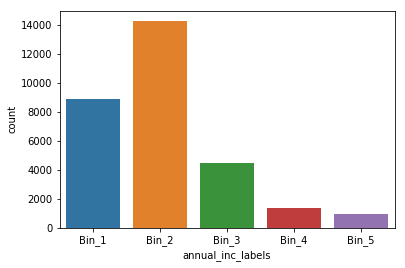

In [45]:
sns.countplot(data.annual_inc_labels)


## Bibiliografia

[1] Sang Kyu Kwak1 and Jong Hae Kim, Statistical data preparation: management of missing values and outliers, Korean J Anesthesiol. 2017 Aug; 70(4): 407–411

[2] https://www.udemy.com/feature-engineering-for-machine-learning/

In [ ]:
data2 = pd.read_excel('FilterMeanAmplitude_P300.xlsx')
data2 = data2.drop(['Sujeto', 'Unnamed: 118', 'ERPset'], axis=1)

# Rango intercuartil para nuestro conjunto de datos
IQR2 = data2.Fte_P4.quantile(0.75) - data2.Fte_P4.quantile(0.25)

# Usando el IQR, calculamos el límite superior usando las fórmulas mencionadas anteriormente
upper_limit2 = data2.Fte_P4.quantile(0.75) + (IQR2 * 1.5)
upper_limit_extreme2 = data2.Fte_P4.quantile(0.75) + (IQR2 * 3)

print(f'Upper limit: {upper_limit2}, upper limit extreme: {upper_limit_extreme2}')

total2 = np.float(data2.Fte_P4.shape[0])
print('Total Ft3_P4: {}'.format(data2.Fte_P4.shape[0]/total2)) # Prestatarios totales
print('Fte_P4 > 11.03: {}'.format(data2[data2.Fte_P4 > upper_limit].Fte_P4.shape[0] / total2))
print('Fte_P4 > 15.62: {}'.format(data2[data2.Fte_P4 > upper_limit_extreme].Fte_P4.shape[0] / total2))